In [2]:
import pandas as pd 
import numpy as np 
import env 
import prepare 
import acquire 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import sklearn.metrics as met

# steps
1-data acquistion 

2-preparation

3-exploratory data analysis

4-statistical testing 

5-modeling 

6-model evaluation

# Business Goals

Find drivers for customer churn at Telco. Why are customers churning?

Construct a ML classification model that accurately predicts customer churn.

Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome?

# 1-Data acquistion 

In [3]:
df_telco=acquire.get_telco_data()
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,2,Yes,2,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,Yes,1,No,2,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,1,Yes,1,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,Yes,1,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,1,Yes,2,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [162]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [5]:
def summarize_df(df):
    '''
    This function returns the shape, info, a preview, the value_counts of object columns
    and the summary stats for numeric columns.
    '''
    print(f'This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')
    print('-----------------------------------------------------------------------------')
    print('')
    print(df.info())
    print('-----------------------------------------------------------------------------')
    print('')
    print(df.head())
    print('-----------------------------------------------------------------------------')
    print('')
print(summarize_df(df_telco))

This dataframe has 7043 rows and 24 columns.
-----------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 

# 2)Preparation

In [6]:
df_telco=prepare.prep_telco(df_telco)

In [7]:
df_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly_charges,total_charges,churn,contract_type,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0002-ORFBO,0,0,1,1,9,1,1,0,1,...,65.6,593.30,0,1,1,0,0,0,0,1
1,0003-MKNFE,1,0,0,0,9,1,2,0,0,...,59.9,542.40,0,12,1,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,4,1,1,0,0,...,73.9,280.85,1,12,0,1,0,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,1,0,1,...,98.0,1237.85,1,12,0,1,0,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,1,0,0,...,83.9,267.40,1,12,0,1,0,0,0,1


In [93]:
df_telco=df_telco.drop(columns=['customer_id','online_security','online_backup','device_protection',\
                       'tech_support','streaming_tv','streaming_movies'])
df_telco.head()

,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,paperless_billing_Yes,churn_Yes,Month-to-month,One year,Two year,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,9,1,65.6,593.30,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1
1,0,9,2,59.9,542.40,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,4,1,73.9,280.85,1,0,0,1,1,1,1,0,0,0,1,0,0,1,0
3,1,13,1,98.0,1237.85,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0
4,1,3,1,83.9,267.40,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1


In [111]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   senior_citizen             7043 non-null   int64  
 1   tenure                     7043 non-null   int64  
 2   multiple_lines             7043 non-null   int64  
 3   monthly_charges            7043 non-null   float64
 4   total_charges              7043 non-null   float64
 5   gender_Male                7043 non-null   uint8  
 6   partner_Yes                7043 non-null   uint8  
 7   dependents_Yes             7043 non-null   uint8  
 8   phone_service_Yes          7043 non-null   uint8  
 9   paperless_billing_Yes      7043 non-null   uint8  
 10  churn_Yes                  7043 non-null   uint8  
 11  Month-to-month             7043 non-null   uint8  
 12  One year                   7043 non-null   uint8  
 13  Two year                   7043 non-null   uint8

In [128]:
# Drop duplicates...run just in case; reassign and check the shape of my data.
df_telco = df_telco.drop_duplicates()
print(df_telco.shape)
train, test = train_test_split(df_telco, test_size=.2, random_state=123, stratify=df_telco.churn_Yes)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)

(7021, 20)


In [131]:
train.shape, validate.shape, test.shape

((3931, 20), (1685, 20), (1405, 20))

In [150]:
train.churn_Yes.mean()

0.26430933604680745

In [130]:
baseline_accuracy = round((train.churn_Yes == 0).mean(), 2)
print(f'Baseline Accuracy',baseline_accuracy)
print(y_train.value_counts())

Baseline Accuracy 0.74
0    3104
1    1121
Name: churn_Yes, dtype: int64


# 3)Exploratory data analysis

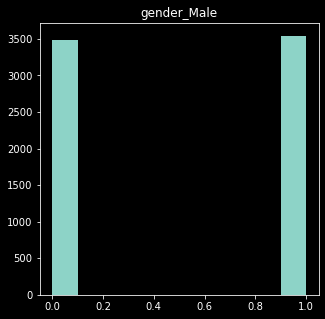

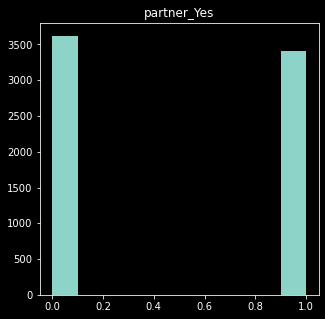

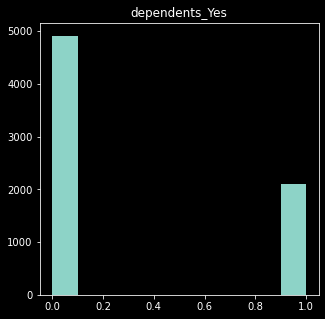

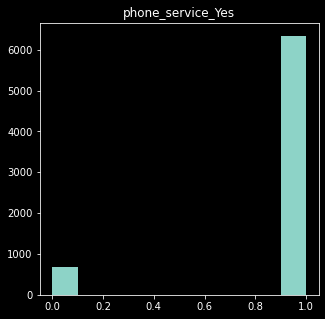

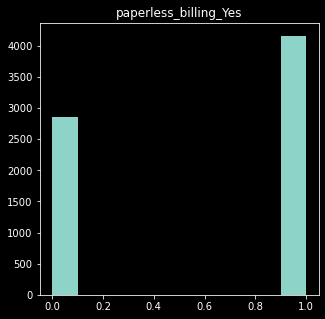

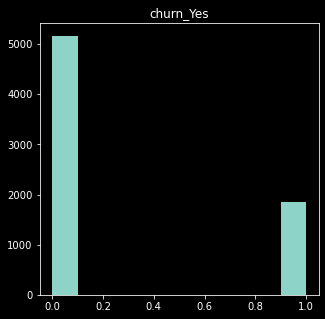

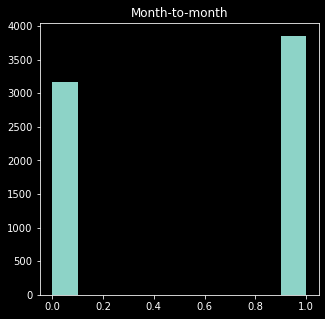

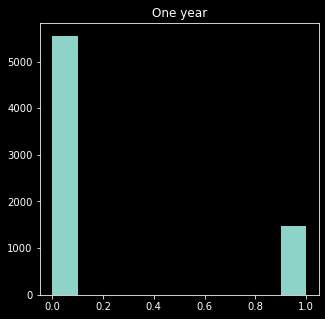

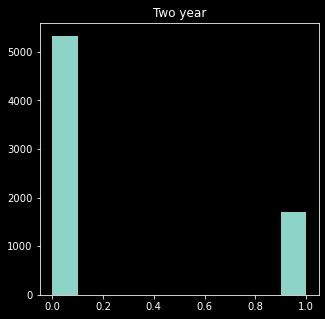

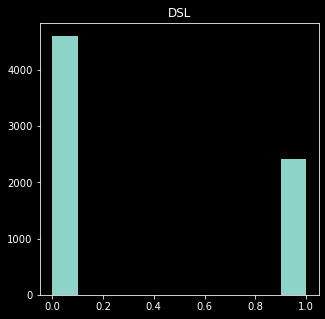

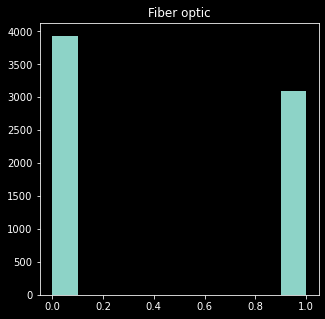

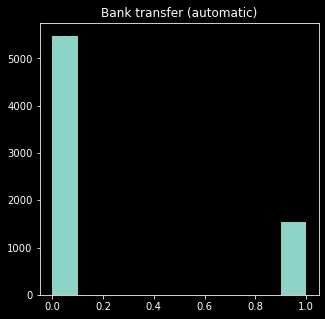

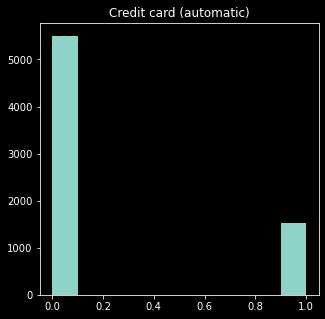

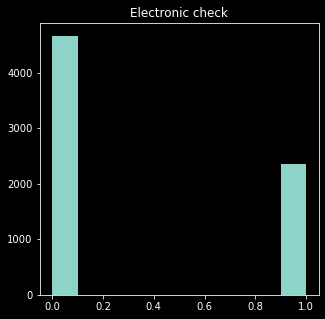

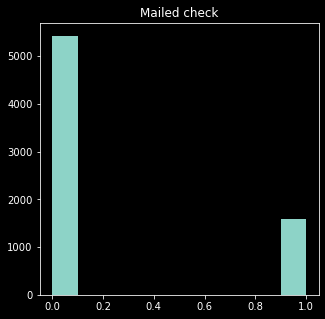

In [137]:
#churn yes or no
num_cols = df_telco.columns[[df_telco[col].dtype == 'uint8' for col in df_telco.columns]]
for col in num_cols:
    plt.figure(figsize=(5,5))
    plt.style.use('dark_background')
    plt.hist(df_telco[col])
    plt.title(col)
    plt.show()

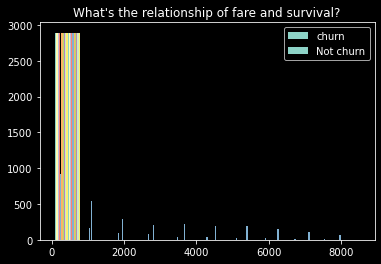

In [144]:
not_churn = train[train.churn_Yes == 0]
churn = train[train.churn_Yes == 1]
plt.title("What's the relationship of fare and survival?")
plt.hist(churn, label="churn")
plt.hist(not_churn, label="Not churn")
plt.legend()
plt.show()

In [156]:
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))
explore_train = train[['churn_Yes','gender_Male']]
melted = explore_train.melt(id_vars=['churn_Yes'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   churn_Yes  3931 non-null   uint8 
 1   variable   3931 non-null   object
 2   value      3931 non-null   uint8 
dtypes: object(1), uint8(2)
memory usage: 38.5+ KB


AttributeError: module 'seaborn' has no attribute 'scatter'

In [160]:
def score_models(X_train, y_train, X_val, y_val):
    '''
    Score multiple models on train and val datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = lr_model, dt_model, rf_model, kn_model.
    '''
    lr_model = LogisticRegression(random_state=123)
    dt_model = DecisionTreeClassifier(max_depth=2, random_state=123)
    rf_model = RandomForestClassifier(max_depth=2, random_state=123)
    kn_model = KNeighborsClassifier()
    models = [lr_model, dt_model, rf_model, kn_model]
    for model in models:
        model.fit(X_train, y_train)
        actual_train = y_train
        predicted_train = model.predict(X_train)
        actual_val = y_val
        predicted_val = model.predict(X_val)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('val score: ')
        print(classification_report(actual_val, predicted_val))
        print('________________________')
        print('')
    return lr_model, dt_model, rf_model, kn_model

# random code need to work with 

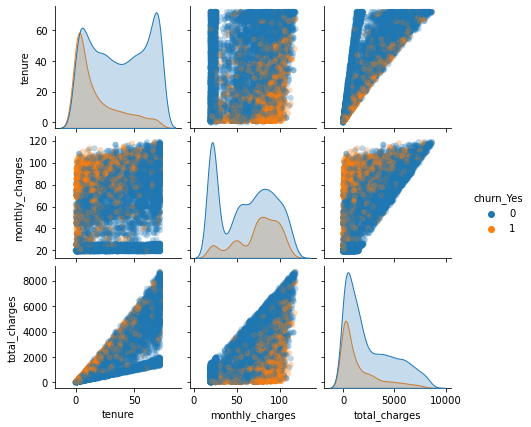

In [107]:
sns.pairplot(df_telco[['tenure', 'monthly_charges', 'total_charges', 'churn_Yes']], 
             hue='churn_Yes', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1);

In [ ]:
# plot the ROC curves
plt.figure(figsize=(10,10))

y_pred = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue',
        lw=3, label='GaussianNB (area = %0.2f)' % auc_list[0])

y_pred = bnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='green',
        lw=3, label='BernoulliNB (area = %0.2f)' % auc_list[1])

y_pred = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red',
        lw=2, label='LogisticRegression (area = %0.2f)' % auc_list[2])

y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow',
        lw=3, label='KNN (area = %0.2f)' % auc_list[3])

y_pred = decisiontree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='purple',
        lw=2, label='DecisionTree (area = %0.2f)' % auc_list[4])

y_pred = randomforest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='brown',
        lw=2, label='RandomForest (area = %0.2f)' % auc_list[5])

y_pred = linearsvc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='cyan',
        lw=2, label='LinearSVC (area = %0.2f)' % auc_list[6])

y_pred = svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='magenta',
        lw=2, label='SVC (area = %0.2f)' % auc_list[7])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [9]:
x = sns.countplot(x =col, data = df_telco)
plt.title('Rainbow')
plt.gcf().set_size_inches(12, 6)
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.bar_label(x.containers[0])
plt.show()

NameError: name 'col' is not defined

In [ ]:
features=["customer_id","gender","senior_citizen","partner","dependents","tenure","phone_service","multiple_lines","online_security"
,"online_backup","device_protection","tech_support","streaming_tv","streaming_movies","paperless_billing","monthly_charges",
"total_charges","churn","contract_type","DSL","Bank_transfer","Credit_card","Electronic_check","Mailed_check"]